In [1]:
import os
import shutil
import numpy as np
import gpflow as gpf
import tensorflow as tf
import sklearn.preprocessing as pp

In [2]:
import sys
sys.path.append('../')

import gprmachine as gpm

In [3]:
example = 'Plankton'
target = 0
n_start = 200
n_train = 50
n_test = 30
n_task = 5
n_iter = 80
k_low_list = [0.0008, 0.0008, 0.005, 0.05, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3,
              0.3, 0.3, 0.8, 12.3, 13.5, 8.9, 3.0, 1.0, 0.5, 1.8,
              40.0, 55.0, 80.9, 75.8, 50.8, 0.8, 0.7, 0.7, 0.7, 0.8]
k_up_list = [0.0009, 0.0009, 0.008, 0.07, 0.55, 0.55, 0.55, 0.4, 0.4, 0.4,
             0.4, 0.4, 0.9, 12.5, 13.6, 9.8, 3.5, 1.3, 0.9, 1.8,
             45.0, 60.0, 88.9, 80.8, 55.8, 0.9, 0.9, 0.8, 0.9, 0.9]

In [4]:
rdata = np.loadtxt('../data/{}.txt'.format(example))

DP = gpm.preprocess.DataProcesser(n_start, n_train, n_test, target)
X_train, Y_train, Y_test = DP.load_data(rdata)

trainer = gpm.train.MultipleTrainer()
mean_MU, mean_VAR = trainer.train(
    X_train, Y_train, n_test, n_task, n_iter, k_low_list, k_up_list)

    >>> Training process is running for group 1 in total of 30 ...
    >>> Training process is running for group 2 in total of 30 ...
    >>> Training process is running for group 3 in total of 30 ...
    >>> Training process is running for group 4 in total of 30 ...
    >>> Training process is running for group 5 in total of 30 ...
    >>> Training process is running for group 6 in total of 30 ...
    >>> Training process is running for group 7 in total of 30 ...
    >>> Training process is running for group 8 in total of 30 ...
    >>> Training process is running for group 9 in total of 30 ...
    >>> Training process is running for group 10 in total of 30 ...
    >>> Training process is running for group 11 in total of 30 ...
    >>> Training process is running for group 12 in total of 30 ...
    >>> Training process is running for group 13 in total of 30 ...
    >>> Training process is running for group 14 in total of 30 ...
    >>> Training process is running for group 15 in total

In [5]:
scaler = pp.MinMaxScaler()
X = rdata
scaler.fit(X[:, target].reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
Y_pred = mean_MU
pred = scaler.inverse_transform(Y_pred.reshape(-1, 1)).ravel()
truth = rdata[n_start+n_train : n_start+n_train+n_test, target]
known = rdata[n_start : n_start+n_train, target]

In [7]:
res_file = f'{example}_{target+1}_T{n_task}.txt'
np.savetxt(res_file, pred)

In [8]:
gpm.eval.MAE_RMSE_PCC(truth, pred)

[0.1236, 0.1572, 0.856]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='ticks', font_scale=1.2)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 15
plt.rcParams['font.sans-serif'] = 'Arial'

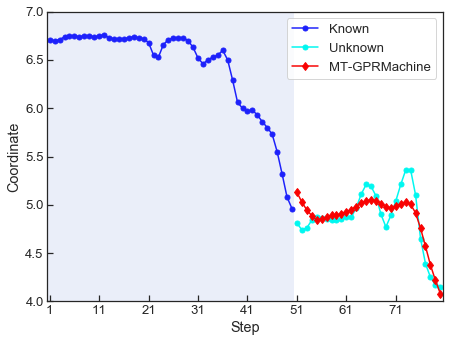

In [10]:
ax = gpm.plot.plot_prediction(known, truth, pred)
ax.set_ylim(4, 7)
ax.set_xticks(range(0, 80, 10))
ax.set_xticklabels(np.arange(1, 80 + 1, 10))
ax.set_xlim(-.5, 80 - .5)
ax.set_xlabel('Step')
ax.set_ylabel('Coordinate')
ax.legend()
plt.tight_layout()